In [33]:
include("../EuclidElements.jl");

# Book 1

## Proposition 6

If in  a triangle two angles be equal to one another, the sides which subtend the equal angles will also be equal to one another.

In [22]:
""" Construct a triangle with 2 equal angles """
function construct_2eqangle_tri(origin::Point2f, base_size, θ, rotationθ)
    # first, get the base
    B = origin + [base_size * cos(rotationθ), base_size * sin(rotationθ)]

    # Now, find any second point for both added lines -- use base_size, it's fine
    line1_P2 = origin + [base_size * cos(rotationθ + θ), base_size * sin(rotationθ + θ)]
    line2_P2 = B + [base_size * cos(rotationθ + (π - θ)), base_size * sin(rotationθ + (π - θ))]

    # Now we can get slope for each line
    line1_m = (line1_P2[2] - origin[2])/(line1_P2[1] - origin[1])
    line2_m = (line2_P2[2] - B[2])/(line2_P2[1] - B[1])

    # Now the y-intercept for each line
    line1_b = line1_P2[2] - line1_m*line1_P2[1]
    line2_b = line2_P2[2] - line2_m*line2_P2[1]

    # now, we can find intersecting x via  line1_m*line1_P2[1] + line1_b = line2_m*line2_P2[1] + line2_b
    int_x = (line2_b - line1_b) / (line1_m - line2_m)
    # and intersecting y via plugging into one of those equations
    int_y = line1_m * int_x + line1_b

    [origin, Point2f(B), Point2f(int_x, int_y)]
end;

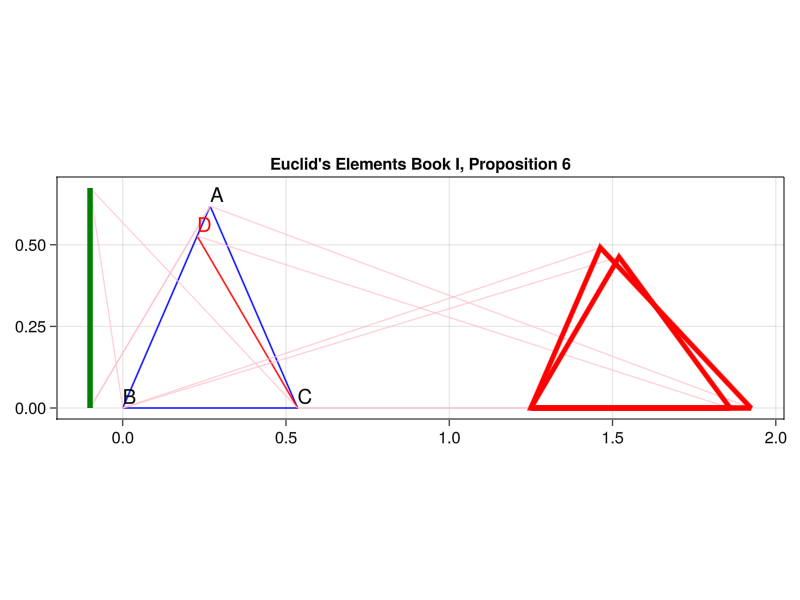

In [41]:
#setup the chart space...
f = Figure()
ax = Axis(f[1,1], aspect=DataAspect(), title="Euclid's Elements Book I, Proposition 6")

#note: we will draw the point labels at the end for clarity, but they will be defined earlier

# Let ABC be a triangle having the angle ABC equal to the angle ACB;
base_size = rand(Uniform(0.5f0, 1f0))
θ = rand(Uniform(0.1f0, 0.49f0π))
B,C,A = construct_2eqangle_tri(Point2f0(0,0), base_size, θ, 0f0)
lines!([A,B], color=:blue)
lines!([A,C], color=:blue)
lines!([B,C], color=:blue)

# I say that the side AB is also equal to the side AC.
# For, if AB is unequal to AC, one of them is greater.

# Let AB be greater;
# and from AB the greater let DB be cut off equal to AC the less;
# let DC be joined.
#               ASIDE: this is absurd, so we just cut ever so slightly lower
D = get_line(B, A, move_out=norm(A-B)-0.1)
lines!([D, C], color=:red)

# Then, since DB is equal to AC     [that's absurd]
# and BC is common,
# the two sides DB, BC are equal to the two sides AC, CB respectively;
# and the angle DBC is equal to the angle ACB;
#   therefore the base DC is equal to the base AB,
# and the triangle DBC will be equal to the triangle ACB, the less to the greater;
# which is absurd.
DBC_ACB = compare_triangle(D, C, B, A, C, B, Point2f(1.25, 0), 0f0, precision=5, cursorcolor=:pink, color=:pink, linewidth=5f0, cursorlinewidth=1f0)
fill_tricompare(DBC_ACB)

# Therefore AB is not unequal to AC;
#       it is therefore equal to it.
AC_BC = compare_lines(A, C, A, B, Point2f(-0.1, 0), π/2f0, precision=5, cursorcolor=:pink, color=:pink, linewidth=5f0, cursorlinewidth=1f0)
fill_linecompare(AC_BC)

# Therefore etc.
#       Q.E.D.


#Now draw the point labels
Apoint = text!(A, text="A")
Bpoint = text!(B, text="B")
Cpoint = text!(C, text="C")
Dpoint = text!(D, text="D", color=:red)

#Draw and show the chart :)
current_figure()

### Animation

In [44]:
#setup the chart space...
f = Figure()
ax = Axis(f[1,1], aspect=DataAspect(), title="Euclid's Elements Book I, Proposition 6")
xlims!(-0.2, 2.0)
ylims!(-0.1, 1.2)

#note: we will draw the point labels at the end for clarity, but they will be defined earlier

# Let ABC be a triangle having the angle ABC equal to the angle ACB;
#base_size = rand(Uniform(0.5f0, 1f0))
#θ = rand(Uniform(0.1f0, 0.49f0π))
B,C,A = construct_2eqangle_tri(Point2f0(0,0), base_size, θ, 0f0)
lines!([A,B], color=:blue)
lines!([A,C], color=:blue)
lines!([B,C], color=:blue)

# I say that the side AB is also equal to the side AC.
# For, if AB is unequal to AC, one of them is greater.

# Let AB be greater;
# and from AB the greater let DB be cut off equal to AC the less;
# let DC be joined.
#               ASIDE: this is absurd, so we just cut ever so slightly lower
D = get_line(B, A, move_out=norm(A-B)-0.1)
DC = straight_line(D, C, color=:red, linewidth=1f0, cursorwidth=0.01f0)

# Then, since DB is equal to AC     [that's absurd]
# and BC is common,
# the two sides DB, BC are equal to the two sides AC, CB respectively;
# and the angle DBC is equal to the angle ACB;
#   therefore the base DC is equal to the base AB,
# and the triangle DBC will be equal to the triangle ACB, the less to the greater;
# which is absurd.
#               ASIDE: like I said, it's absurd!
DBC_ACB = compare_triangle(D, C, B, A, C, B, Point2f(1.25, 0), 0f0, precision=5, cursorcolor=:pink, color=:pink, linewidth=5f0, cursorlinewidth=1f0)

# Therefore AB is not unequal to AC;
#       it is therefore equal to it.
AC_BC = compare_lines(C, A, B, A, Point2f(-0.1, 0), π/2f0, precision=5, cursorcolor=:pink, color=:pink, linewidth=5f0, cursorlinewidth=1f0)

# Therefore etc.
#       Q.E.D.


#Now draw the point labels
Apoint = text!(A, text="A")
Bpoint = text!(B, text="B")
Cpoint = text!(C, text="C")
DAlpha = Observable(0f0)
Dpoint = text!(D, text="D", color=@lift(RGBA(1, 0, 0, $DAlpha)))

# Draw the animation!
framerate = 24
d_s = 24
t_rots = 4.5π
timestamps = range(0,t_rots, step=t_rots/(d_s*framerate))

record(f, "Euclid-I-06.01.gif", timestamps; framerate=framerate) do t

    # animate the drawing setup
    animate_line(DC, 1f0π, 1.5f0π, t)

    # Animate showing the point D
    if t > 0.5π && t <= π
        showD = (t - 0.5π)/0.5π
        DAlpha[] = showD
    elseif t > π
        DAlpha[] = 1f0
    end

    # animate the triangle comparisons
    animate_tricompare(DBC_ACB, 1.5f0π, 2f0π, t, fade_start=2.5π, fade_end=3.5π)
    animate_linecompare(AC_BC, 2f0π, 2.5f0π, t, fade_start=3π, fade_end=4π)
end;

![animation](Euclid-I-06.01.gif)